# Multivariate Analysis: PCA, Factor Analysis and Cluster Analysis

The main of this module is to utilize machine learning methods of Principal Component analysis (PCA), Factor Analysis and Cluster Analysis to analyze and extract socioeconomic indicators from survey data. 

## Configure Environment 

### Import libraries

In [1]:
import os
from typing import Dict
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans

### Utility Functions

In [2]:
def make_mydir(dirname: str) -> Path:
    """
    Creates a directory, including parent directories if they do not exist.

    :param dirname: The path of the directory to create.
    :return: Path object representing the created directory.
    """
    path = Path(dirname)
    # Create the directory, along with any necessary parent directories
    path.mkdir(parents=True, exist_ok=True)
    return path

## Process 

### Read Data

In [3]:
# Define the path to the analyzed input data file
input_file_path = "../resources/data/input/standardized_processed_input_data.csv"

# Specify columns to exclude from analysis
exclude_from_in_vars_cols = ['hhid', 'hv025']

# Load the data into a DataFrame
in_df = pd.read_csv(input_file_path)

# Display the first few rows of the DataFrame
display(in_df.head())

# Print the size of the DataFrame
print(f'Size of DataFrame: {in_df.shape}')

hhid     hv009  hv025     hv207     hv212     hv216     hv219  \
0      10706  5  0.351393      1  1.494803 -0.342264  1.392528 -0.387135   
1      10706 15 -0.648267      1 -0.668985 -0.342264  1.392528  2.583079   
2      10706 24  1.850885      1 -0.668985 -0.342264 -0.017303  2.583079   
3      10706 34 -0.148437      1 -0.668985  2.921723 -0.017303 -0.387135   
4      10706 53  0.351393      1 -0.668985 -0.342264 -0.017303  2.583079   

      hv220     hv221     hv237  ...  age_21_30  age_31_40  age_41_50  \
0 -0.054182  1.985521  2.306065  ...  -0.864431  -0.796786   2.568372   
1  0.297279 -0.503646 -0.433639  ...   1.396440  -0.796786  -0.650438   
2  0.789324 -0.503646 -0.433639  ...   1.396440   2.026297  -0.650438   
3  0.297279  1.985521 -0.433639  ...  -0.864431  -0.796786   0.958967   
4  1.281368 -0.503646  2.306065  ...   0.266005   0.614755   0.958967   

   age_51_60   age_60+  no_education   primary  secondary    higher  \
0  -0.587886 -0.492876     -0.269792 -0.831126   1.066206  0.602973   
1   1.116392 -0.492876     -0.269792 -0.831126   0.305405 -0.542428   
2   1.116392 -0.492876      1.300231  0.112582   1.827008 -0.542428   
3   1.116392 -0.492876     -1.054803  0.112582   1.066206 -0.542428   
4  -0.587886  1.361254     -0.269792  0.112582   1.066206 -0.542428   

   member_attend_school_count  
0                    0.737485  
1                   -0.848982  
2                   -0.848982  
3                    0.737485  
4                   -0.055749  

[5 rows x 56 columns]

Size of DataFrame: (23222, 56)


In [4]:
# Drop specified columns from the DataFrame to create the feature set
X = in_df.drop(columns=exclude_from_in_vars_cols)

# Display the first few rows of the feature set
display(X.head())

# Print the size of the feature set
print(f'Size of DataFrame: {X.shape}')

hv009     hv207     hv212     hv216     hv219     hv220     hv221  \
0  0.351393  1.494803 -0.342264  1.392528 -0.387135 -0.054182  1.985521   
1 -0.648267 -0.668985 -0.342264  1.392528  2.583079  0.297279 -0.503646   
2  1.850885 -0.668985 -0.342264 -0.017303  2.583079  0.789324 -0.503646   
3 -0.148437 -0.668985  2.921723 -0.017303 -0.387135  0.297279  1.985521   
4  0.351393 -0.668985 -0.342264 -0.017303  2.583079  1.281368 -0.503646   

      hv237    hv237d    hv243b  ...  age_21_30  age_31_40  age_41_50  \
0  2.306065  2.941636  0.717599  ...  -0.864431  -0.796786   2.568372   
1 -0.433639 -0.339947  0.717599  ...   1.396440  -0.796786  -0.650438   
2 -0.433639 -0.339947  0.717599  ...   1.396440   2.026297  -0.650438   
3 -0.433639 -0.339947  0.717599  ...  -0.864431  -0.796786   0.958967   
4  2.306065  2.941636  0.717599  ...   0.266005   0.614755   0.958967   

   age_51_60   age_60+  no_education   primary  secondary    higher  \
0  -0.587886 -0.492876     -0.269792 -0.831126   1.066206  0.602973   
1   1.116392 -0.492876     -0.269792 -0.831126   0.305405 -0.542428   
2   1.116392 -0.492876      1.300231  0.112582   1.827008 -0.542428   
3   1.116392 -0.492876     -1.054803  0.112582   1.066206 -0.542428   
4  -0.587886  1.361254     -0.269792  0.112582   1.066206 -0.542428   

   member_attend_school_count  
0                    0.737485  
1                   -0.848982  
2                   -0.848982  
3                    0.737485  
4                   -0.055749  

[5 rows x 54 columns]

Size of DataFrame: (23222, 54)


### PCA

In [5]:
# Initialize PCA with no specified number of components and full SVD solver
pca = PCA(n_components=None, svd_solver='full')

# Fit the PCA model to the feature set to compute principal components
pca.fit(X)

PCA(svd_solver='full')

In [6]:
# Print the eigenvalues of the principal components, indicating the amount of variance each component explains
print(pca.explained_variance_)

[6.56342414e+00 4.24297917e+00 3.04467876e+00 2.41516504e+00
 1.68123982e+00 1.65157960e+00 1.54291209e+00 1.50005001e+00
 1.35257948e+00 1.31412654e+00 1.24812880e+00 1.17308761e+00
 1.11510904e+00 1.10366889e+00 1.07869620e+00 9.81688661e-01
 9.72185209e-01 9.36939267e-01 8.87857695e-01 8.77328592e-01
 8.31553829e-01 8.28275134e-01 8.07443234e-01 7.53555356e-01
 7.51709577e-01 7.08798148e-01 6.92519312e-01 6.62195510e-01
 6.45039090e-01 6.35869451e-01 6.18856800e-01 6.00148990e-01
 5.66942029e-01 5.57275173e-01 5.21011654e-01 4.82192087e-01
 4.66687853e-01 4.20502187e-01 3.11639192e-01 2.42591036e-01
 2.36598036e-01 1.96810974e-01 1.84562824e-01 1.72897922e-01
 1.50020298e-01 1.14008825e-01 1.07819989e-01 8.67914993e-02
 8.47447124e-02 7.63542171e-02 2.66351291e-02 7.84896290e-05
 2.39189668e-27 1.29432481e-30]


In [7]:
# Display the principal axes in feature space, representing the directions of maximum variance
print(pca.components_)

[[-7.67956512e-02  1.06349320e-01  1.36862923e-01 ... -1.56607981e-02
   1.62962414e-01 -3.65698152e-02]
 [ 3.46456909e-01  3.82077315e-02  8.43555246e-02 ...  2.59789941e-01
   6.22776140e-02  3.59420171e-01]
 [-6.40695392e-02  6.54529822e-02  9.20928261e-02 ...  5.54838677e-02
   1.14399636e-01  4.67126503e-02]
 ...
 [-2.59006257e-01  2.16777592e-05  8.38112368e-05 ...  5.13052250e-01
   3.40752414e-01 -2.86970453e-04]
 [ 8.17449737e-01  2.77555756e-16 -7.21644966e-16 ...  2.73218947e-17
  -8.72782749e-17 -3.24555920e-16]
 [ 6.53300993e-03  1.19262239e-16  1.08420217e-18 ... -3.54420947e-15
  -2.24325665e-15 -1.23386019e-16]]


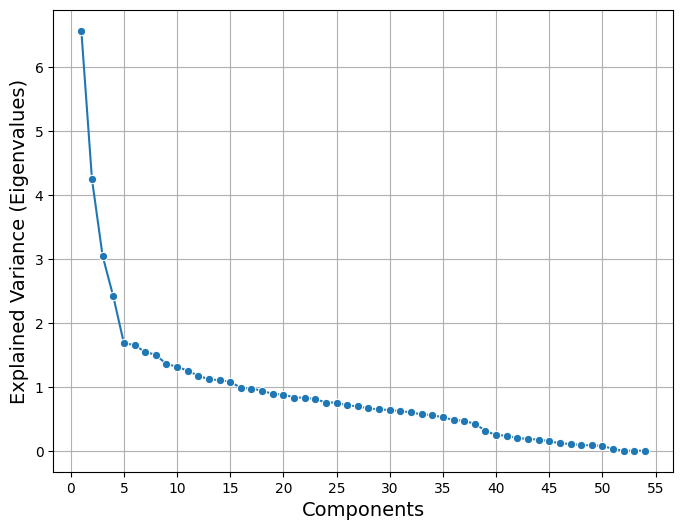

In [8]:
# Create a DataFrame to store the explained variance of each principal component
res_df = pd.DataFrame(pca.explained_variance_)
res_df = res_df.reset_index()  # Reset index for easier manipulation
res_df['index'] = res_df['index'] + 1  # Adjust index for 1-based component numbering
res_df.columns = ['Components', 'Explained Variance']  # Rename columns for clarity

# Display the DataFrame
res_df

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a line plot to visualize the explained variance by component
sns.lineplot(data=res_df, x='Components', y='Explained Variance', markers=True, marker='o')

# Set plot title and axis labels
plt.xlabel('Components', fontsize=14)
plt.ylabel("Explained Variance (Eigenvalues)", fontsize=14)

# Customize the number of ticks on the x-axis for better readability
num_ticks = 15  # Adjust this value based on the number of components
plt.locator_params(axis='x', nbins=num_ticks)

# Enable grid for easier interpretation
plt.grid(True)

# Show the plot
plt.show()

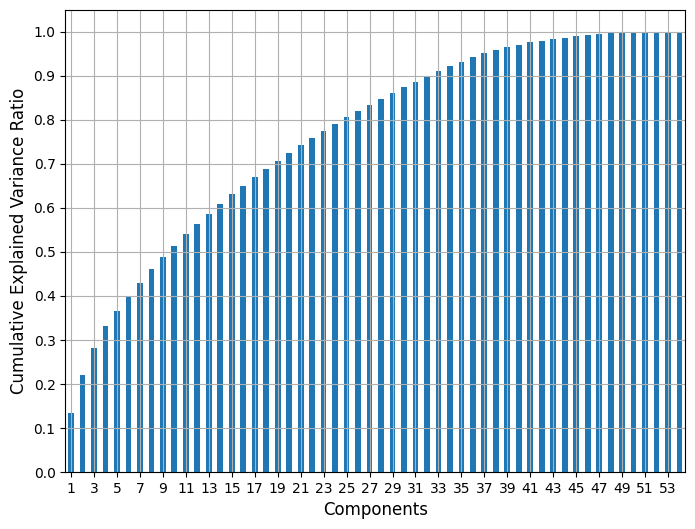

In [9]:
# Create a DataFrame for the cumulative explained variance ratio of the principal components
res_df = pd.DataFrame(pca.explained_variance_ratio_).cumsum()
res_df = res_df.reset_index()
res_df['index'] = res_df['index'] + 1  # Adjust index for better labeling
res_df.columns = ['Components', 'Cumulative Explained Variance Ratio']
res_df = res_df.set_index('Components')

res_df

# Set figure size for the bar plot
figsize = (8, 6)

# Plot cumulative explained variance ratio as a bar chart
ax = res_df.plot.bar(rot=0, figsize=figsize)
ax.get_legend().remove()  # Remove legend for clarity

# Set title and labels for axes
plt.xlabel('Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.locator_params(axis='x', nbins=30)  # Customize x-axis ticks
plt.locator_params(axis='y', nbins=20)  # Customize y-axis ticks
plt.grid()  # Add grid for better readability

# Show the plot
plt.show()

### Factor Analysis

In [10]:
# Initialize the Factor Analyzer with 5 factors, no rotation, and using the principal method
fa = FactorAnalyzer(n_factors=5, rotation=None, method='principal', svd_method='randomized')

# Fit the model to the dataset
fa.fit(X)  # This computes the factor loadings based on the specified number of factors
fa  # Display the fitted Factor Analyzer object

FactorAnalyzer(method='principal', n_factors=5, rotation=None,
               rotation_kwargs={})

In [11]:
# Print the shape of the Factor Loading matrix (number of factors x number of variables)
print(f'Size of Factor Loading matrix: {fa.loadings_.shape}')

# Display the factor loading for the first component (index 0)
print('Factor Loading of 1st component')
fa.loadings_[:, 0]  # Access the loadings for the first factor

Size of Factor Loading matrix: (54, 5)
Factor Loading of 1st component


array([-0.35733586,  0.25391658,  0.32994002, -0.04260052,  0.03566116,
       -0.02014936,  0.38837215,  0.25953821,  0.36498747,  0.46438561,
       -0.28105972, -0.41116768, -0.32556994,  0.49479411,  0.01823384,
        0.52326702,  0.34241179,  0.61401892,  0.65528765, -0.49049963,
       -0.33284119,  0.32603788, -0.41143536,  0.39057139, -0.37987421,
       -0.47863037,  0.63746493, -0.32080839, -0.43721633,  0.54280575,
       -0.02687365, -0.51638812,  0.61215886, -0.60318615, -0.18298875,
        0.29902682,  0.03833894,  0.20835236,  0.34621541, -0.22484482,
       -0.28200542, -0.24034287, -0.20763005, -0.24340239,  0.00559593,
       -0.08877124, -0.07735541,  0.00744386, -0.00977621, -0.45188527,
       -0.31176523, -0.11378994,  0.45558493, -0.19567689])

In [12]:
# Create a DataFrame to store component loading data
component_df = pd.DataFrame()

# Add variable identifiers to the DataFrame
component_df['Variable Id'] = pca.feature_names_in_

# Set the number of selected components for loading data
no_selected_components = 5

# Populate the DataFrame with loading values for each component
for i in range(no_selected_components):
    component_df[f"comp_{i+1}_loadings"] = fa.loadings_[:, i]

# Define output directory and file path for saving the loading data
output_file_dir = make_mydir("../resources/data/output/")
output_file_path = os.path.join(output_file_dir, "component_loadings.csv")

# Save the DataFrame to a CSV file
component_df.to_csv(output_file_path, index=False)
print(f"file saved to: {output_file_path}")

# Display the first few rows of the component loading DataFrame
component_df.head()

file saved to: ..\resources\data\output\component_loadings.csv


Variable Id  comp_1_loadings  comp_2_loadings  comp_3_loadings  \
0       hv009        -0.357336         0.851093        -0.118264   
1       hv207         0.253917         0.107684         0.124979   
2       hv212         0.329940         0.209572         0.156158   
3       hv216        -0.042601         0.623441         0.200544   
4       hv219         0.035661        -0.409769         0.263922   

   comp_4_loadings  comp_5_loadings  
0        -0.053326        -0.123200  
1         0.074096         0.170215  
2         0.253663        -0.156233  
3        -0.051732        -0.044967  
4        -0.199891        -0.026481

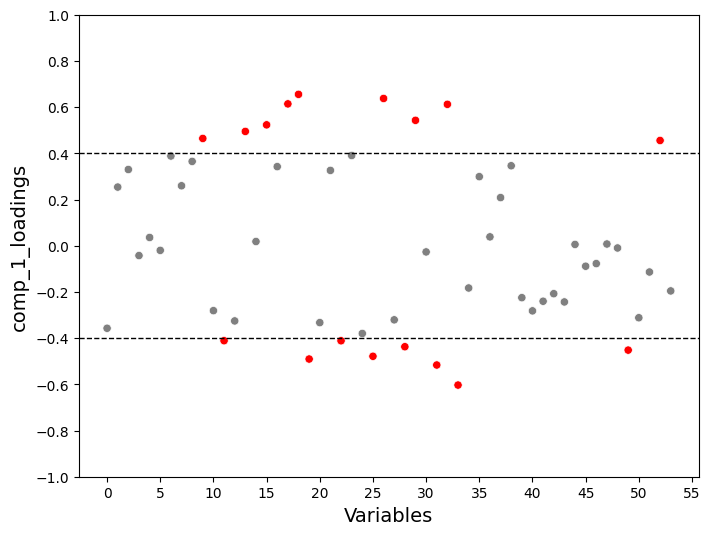

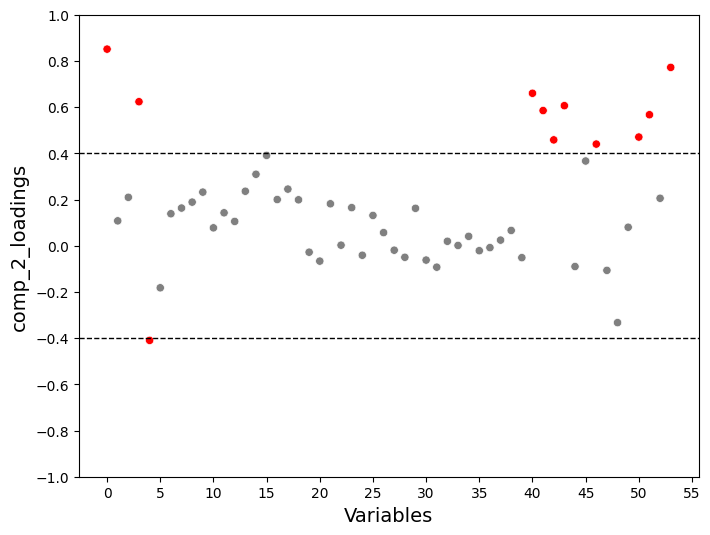

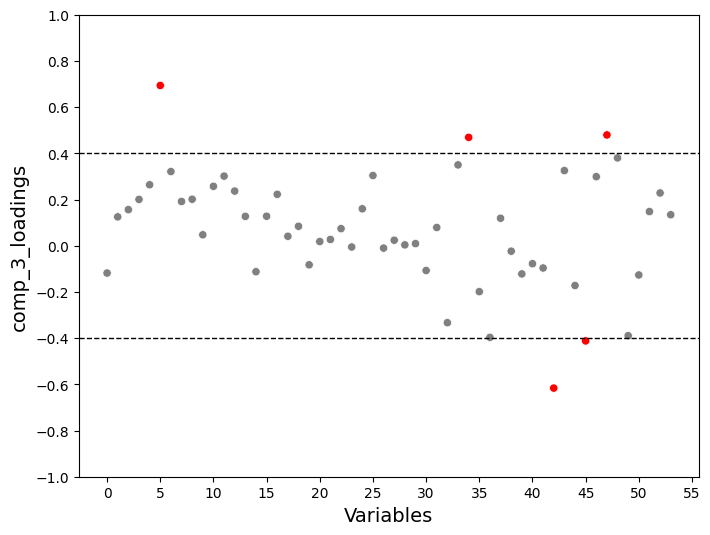

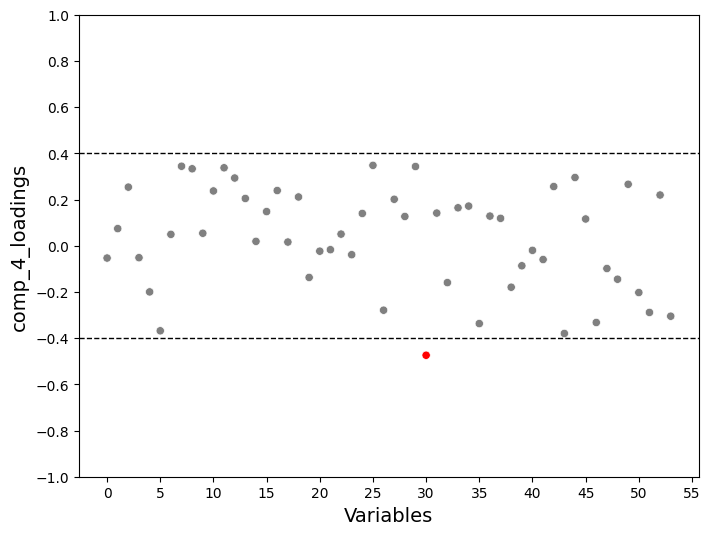

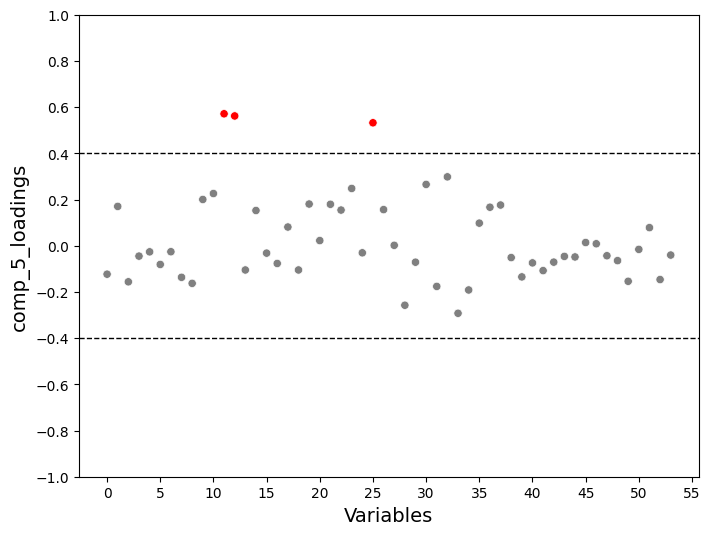

In [13]:
# Loop through each selected component to create scatter plots of loadings
for i in range(no_selected_components):
    comp = f"comp_{i+1}_loadings"  # Define the current component's name
    res_df = pd.DataFrame()  # Initialize a new DataFrame for results
    res_df = component_df[[comp]]  # Extract the loadings for the current component
    
    # Apply a threshold to categorize loadings as significant or not
    res_df.loc[:, ['Threshold']] = res_df[comp].apply(lambda x: 0 if x < 0.4 and x > -0.4 else 1)
    
    # Set figure size for the plot
    plt.figure(figsize=(8, 6))
    
    # Create a scatter plot with color coding based on loading significance
    sns.scatterplot(data=res_df, 
                    y=comp, 
                    x=list(res_df.index), 
                    hue='Threshold', 
                    palette={0: 'grey', 1: 'red'})
    
    # Label the axes
    plt.xlabel("Variables", fontsize=14)
    plt.ylabel(f"{comp}", fontsize=14)
    
    # Customize the number of ticks on the x-axis
    num_ticks = 15
    plt.locator_params(axis='x', nbins=num_ticks)
    
    # Set y-axis limits based on the loading values
    plt.ylim(-1, 1)
    num_ticks = 10  # Customize the number of ticks on the y-axis
    plt.locator_params(axis='y', nbins=num_ticks)
    
    # Add dashed horizontal lines at loading thresholds of 0.4 and -0.4
    plt.axhline(0.4, color='black', linestyle='--', linewidth=1)
    plt.axhline(-0.4, color='black', linestyle='--', linewidth=1)
    
    # Remove the legend for clarity
    plt.legend().remove()
    
    # Display the plot
    plt.show()

### Visual Analysis: PCA vs Area

In [14]:
# Transform the original dataset using PCA to reduce dimensions
X_transformed = pca.fit_transform(X)

# Display the transformed data matrix
display(X_transformed)

# Print the size of the transformed matrix to verify dimensions
print(f'Size of transformed matrix: {X_transformed.shape}')

array([[ 3.94925355e+00,  3.56697801e+00,  2.81944690e+00, ...,
        -1.05273401e-04, -7.44158095e-12,  1.05341076e-15],
       [ 2.93108325e+00, -2.07028082e+00, -1.25412273e-01, ...,
        -2.01789658e-05, -2.21479888e-15, -4.15704142e-15],
       [-3.14016248e-01,  8.58411173e-01, -6.21425536e-01, ...,
         3.19614876e-04, -6.52175199e-15, -8.39321247e-15],
       ...,
       [-3.66490215e+00, -6.46350282e-01, -1.35160858e+00, ...,
         8.56756920e-04, -3.18287407e-15,  3.42020929e-16],
       [ 2.72344620e-01,  9.72160194e-01, -1.13752807e-03, ...,
         1.21367358e-04,  3.44777024e-15,  1.09131776e-16],
       [-3.10751165e+00,  2.13495275e+00,  7.43303987e-01, ...,
        -1.16251019e-04,  1.98826593e-15, -2.07839341e-17]])

Size of transformed matrix: (23222, 54)


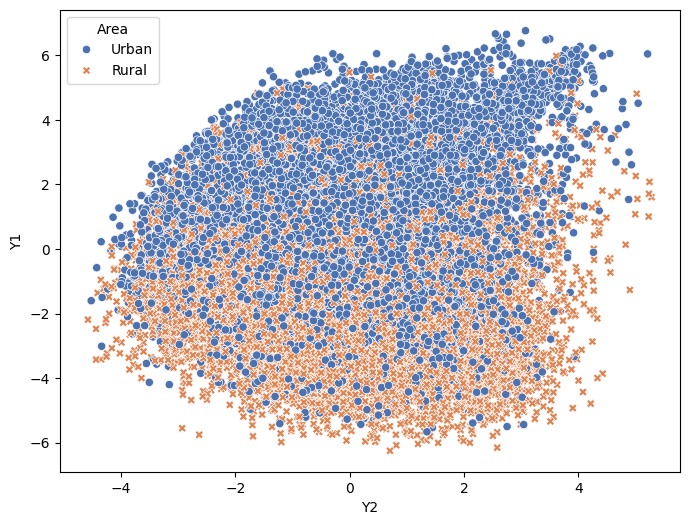

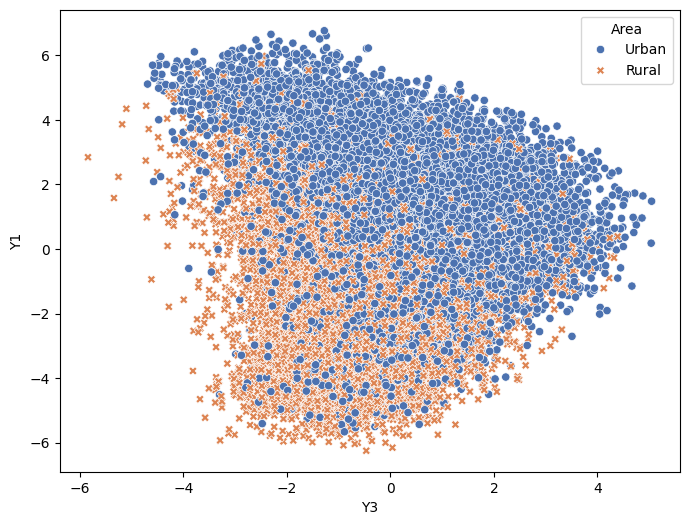

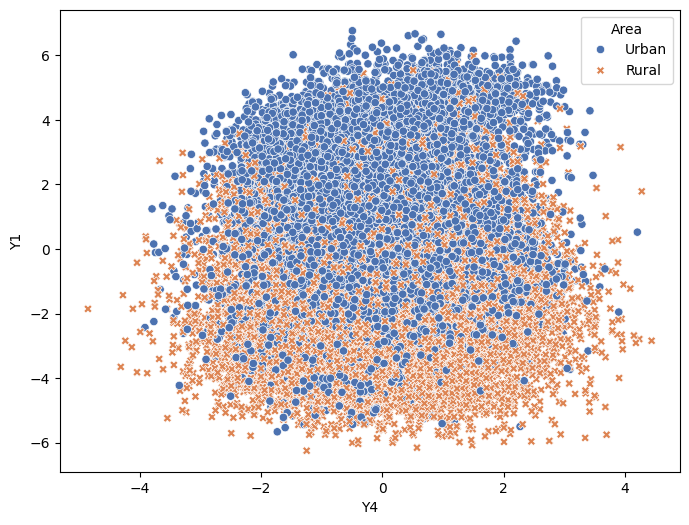

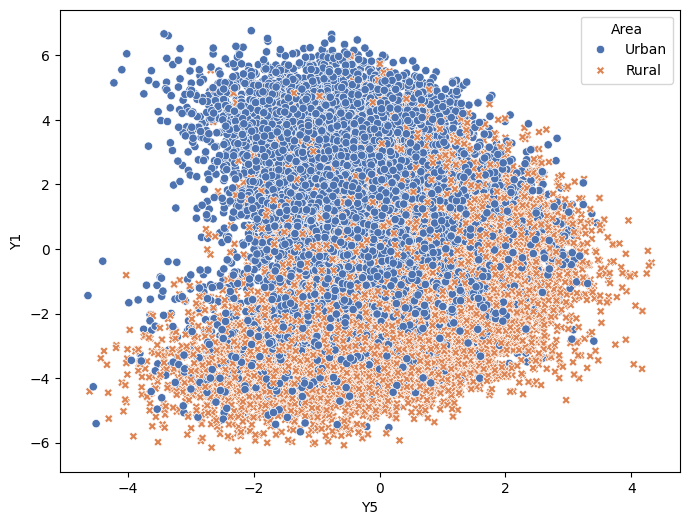

In [15]:
# Loop through the selected components starting from the second component
for comp in range(2, no_selected_components + 1):
    # Create a DataFrame for plotting, including the household ID, area type, and selected PCA components
    rest_df = pd.DataFrame({
        'hhid': in_df['hhid'],
        'Area': in_df['hv025'].replace({1: "Urban", 2: "Rural"}),  # Map area codes to descriptive names
        'Y1': X_transformed[:, 0],  # First PCA component
        f'Y{comp}': X_transformed[:, comp]  # Current PCA component in the loop
    })

    # Set figure size for the plot
    plt.figure(figsize=(8, 6))
    
    # Create a scatter plot of the PCA components, colored by area type
    sns.scatterplot(data=rest_df, x=f"Y{comp}", y="Y1", hue="Area", palette="deep", style="Area")
    
    # Set axis labels
    plt.xlabel(f"Y{comp}", fontsize=10)
    plt.ylabel('Y1', fontsize=10)
    
    # Display the plot
    plt.show()

### Cluster Analysis: PCA vs Area

#### Utility Functions

In [16]:
def plot_line_search(score_df: pd.DataFrame):
    """
    Visualizes silhouette scores for different cluster sizes using a line plot.

    Parameters:
    score_df (pd.DataFrame): A DataFrame containing 'n_clusters' and 'silhouette_avg' columns.
    """
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=score_df, x='n_clusters', y='silhouette_avg', markers=True, marker='o')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel("Silhouette Score", fontsize=14)
    plt.grid(True)
    plt.show()

In [17]:
def search_no_clusters(X_transformed: np.array, comp: int, n_clusters: int = 10):
    """
    Searches for the optimal number of clusters by evaluating silhouette scores.

    Parameters:
    X_transformed (np.array): The transformed data from PCA.
    comp (int): The index of the PCA component to use for clustering (1-based).
    n_clusters (int): The maximum number of clusters to test (default is 10).
    """
    # Select the specified PCA component for clustering and reshape it
    y = X_transformed[:, comp - 1].reshape(-1, 1)
    
    # Create a DataFrame to store silhouette scores for different cluster sizes
    score_df = pd.DataFrame(columns=["n_clusters", "silhouette_avg"])
    
    # Iterate over the range of cluster sizes from 2 to n_clusters
    for i, n_clusters in enumerate(range(2, n_clusters + 1)):
        
        # Initialize KMeans clustering with the current number of clusters
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        
        # Fit the model and predict cluster labels
        cluster_labels = clusterer.fit_predict(y)
        
        # Calculate the average silhouette score for the current clustering
        silhouette_avg = silhouette_score(y, cluster_labels)
        
        # Print the silhouette score for the current number of clusters
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )
        
        # Store the number of clusters and the corresponding silhouette score in the DataFrame
        score_df.loc[i, 'n_clusters'] = n_clusters
        score_df.loc[i, 'silhouette_avg'] = silhouette_avg

    print()
    plot_line_search(score_df)

In [18]:
def cluster_analysis(X_transformed: np.array, comp: int, n_selected_clusters: int, adjusted_class_labels: Dict):
    """
    Performs cluster analysis using KMeans on a specified PCA component and visualizes the results.

    Parameters:
    X_transformed (np.array): The transformed data from PCA.
    comp (int): The index of the PCA component to use for clustering (1-based).
    n_selected_clusters (int): The number of clusters to form.
    adjusted_class_labels (Dict): A dictionary to adjust cluster labels for consistency.
    """
    
    # Color dictionary for cluster visualization
    color_dict = {
        0: 'blue',
        1: 'orange',
        2: 'green',
        3: 'red',
    }
    
    # Create a DataFrame for area types and the selected PCA component
    rest_df = pd.DataFrame({
        'Area': in_df['hv025'].replace({1: "Urban", 2: "Rural"}),  # Replace area codes with labels
        f'Y{comp}': X_transformed[:, comp - 1]  # Add the transformed variable
    })
    
    # Reset index to create a unique identifier for households
    rest_df = rest_df.reset_index()
    rest_df = rest_df.rename(columns={'index': 'Households'})  # Rename index for clarity
    
    # Initialize KMeans clustering
    clusterer = KMeans(n_clusters=n_selected_clusters, random_state=10)
    
    # Display the KMeans object
    display(clusterer)
    
    # Fit the model and assign cluster labels
    y = X_transformed[:, comp - 1].reshape(-1, 1)
    rest_df['cluster_labels'] = clusterer.fit_predict(y)
    
    # Adjust cluster labels if provided
    if adjusted_class_labels is not None:
        rest_df['cluster_labels'] = rest_df['cluster_labels'].replace(adjusted_class_labels)
    
    # Print newline for better readability
    print()
    
    # Display the updated DataFrame
    display(rest_df.head())
    print()

    # Create a scatter plot to visualize clustering results
    plt.figure(figsize=(10, 6))
    sns.relplot(
        data=rest_df, x="Households", y=f"Y{comp}",
        col="Area", hue="cluster_labels", palette=color_dict, 
        kind="scatter"
    )

#### Y1

For n_clusters = 2 The average silhouette_score is : 0.5869805710581876
For n_clusters = 3 The average silhouette_score is : 0.5593222477362418
For n_clusters = 4 The average silhouette_score is : 0.5390702036753693
For n_clusters = 5 The average silhouette_score is : 0.5358875794101964
For n_clusters = 6 The average silhouette_score is : 0.5284648386826261
For n_clusters = 7 The average silhouette_score is : 0.5220088214702038
For n_clusters = 8 The average silhouette_score is : 0.5235645030348032
For n_clusters = 9 The average silhouette_score is : 0.5187546459854031
For n_clusters = 10 The average silhouette_score is : 0.5212627896490526



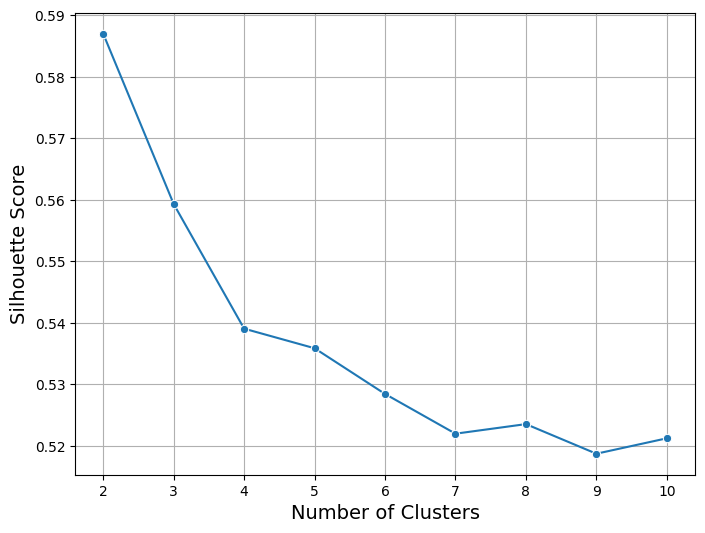

In [19]:
comp = 1
search_no_clusters(X_transformed=X_transformed, comp=comp)

In [20]:
n_selected_clusters = 4
print(f'Selected Number of Clusters: {n_selected_clusters}')

Selected Number of Clusters: 4


KMeans(n_clusters=4, random_state=10)

Households   Area        Y1  cluster_labels
0           0  Urban  3.949254               3
1           1  Urban  2.931083               3
2           2  Urban -0.314016               1
3           3  Urban  3.735537               3
4           4  Urban  3.228408               3

<Figure size 1000x600 with 0 Axes>

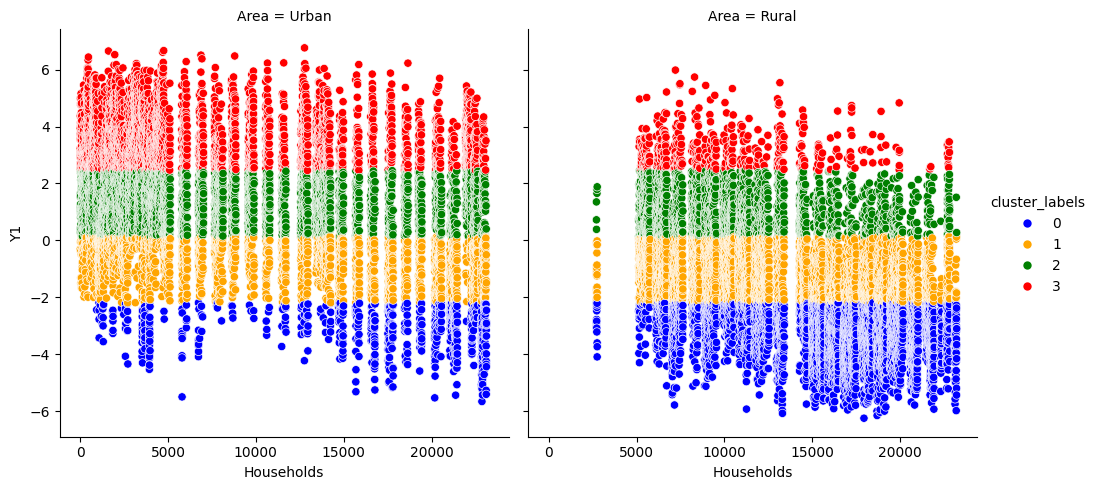

In [21]:
cluster_analysis(X_transformed=X_transformed, comp=comp, n_selected_clusters=n_selected_clusters,
                 adjusted_class_labels={2:1, 3:2, 1:3})

#### Y2

For n_clusters = 2 The average silhouette_score is : 0.5726512421090478
For n_clusters = 3 The average silhouette_score is : 0.5297354631919527
For n_clusters = 4 The average silhouette_score is : 0.5344387746463231
For n_clusters = 5 The average silhouette_score is : 0.5300922746241473
For n_clusters = 6 The average silhouette_score is : 0.5219807492932941
For n_clusters = 7 The average silhouette_score is : 0.5239744730767888
For n_clusters = 8 The average silhouette_score is : 0.522832820847382
For n_clusters = 9 The average silhouette_score is : 0.5243409833747036
For n_clusters = 10 The average silhouette_score is : 0.523922141694092



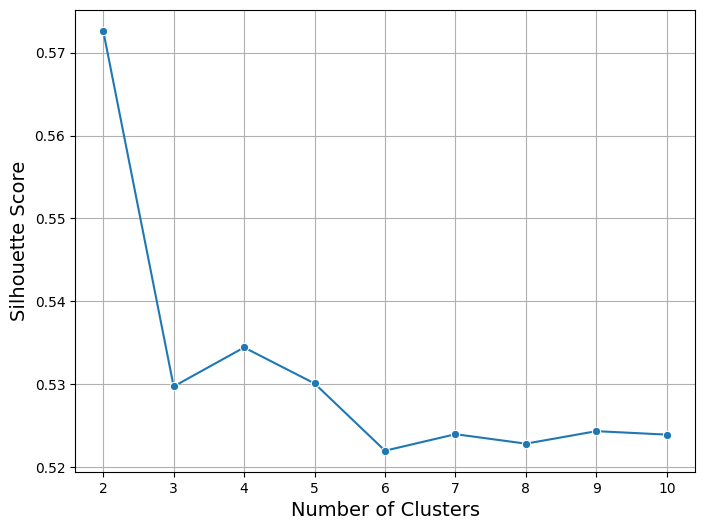

In [22]:
comp = 2
search_no_clusters(X_transformed=X_transformed, comp=comp)

In [23]:
n_selected_clusters = 3
print(f'Selected Number of Clusters: {n_selected_clusters}')

Selected Number of Clusters: 3


KMeans(n_clusters=3, random_state=10)

Households   Area        Y2  cluster_labels
0           0  Urban  3.566978               2
1           1  Urban -2.070281               0
2           2  Urban  0.858411               1
3           3  Urban  1.668086               2
4           4  Urban  0.413360               1

<Figure size 1000x600 with 0 Axes>

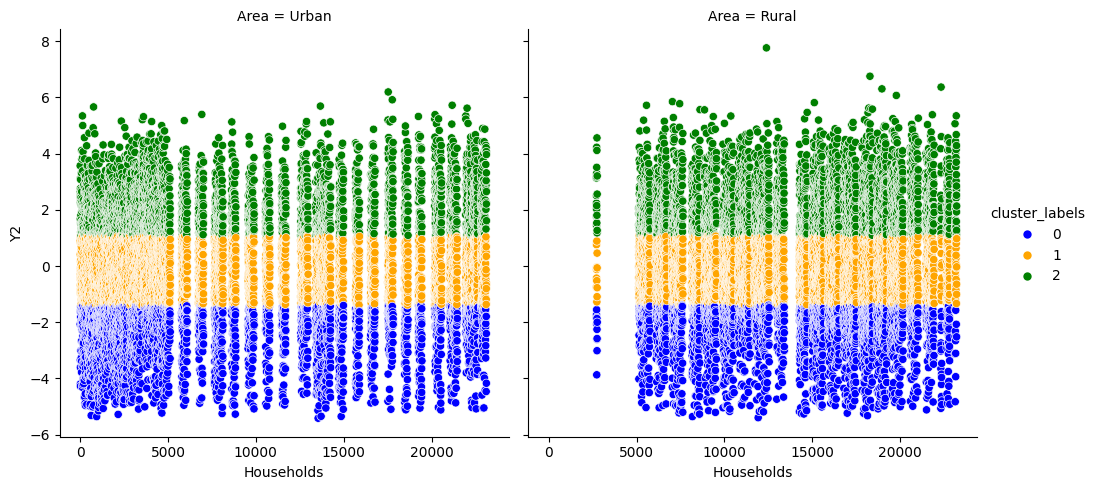

In [24]:
cluster_analysis(X_transformed=X_transformed, comp=comp, n_selected_clusters=n_selected_clusters,
                 adjusted_class_labels={2: 0,  0: 2})

#### Y3

For n_clusters = 2 The average silhouette_score is : 0.5892621870005679
For n_clusters = 3 The average silhouette_score is : 0.5477554029983622
For n_clusters = 4 The average silhouette_score is : 0.5341781796443352
For n_clusters = 5 The average silhouette_score is : 0.5288555827606725
For n_clusters = 6 The average silhouette_score is : 0.526458492589116
For n_clusters = 7 The average silhouette_score is : 0.5190572868022981
For n_clusters = 8 The average silhouette_score is : 0.5210316533003302
For n_clusters = 9 The average silhouette_score is : 0.5175068736097378
For n_clusters = 10 The average silhouette_score is : 0.5193846040454816



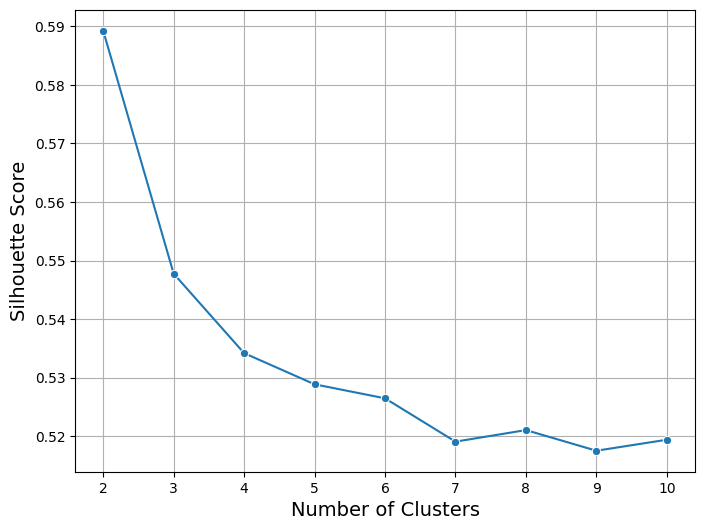

In [25]:
comp = 3
search_no_clusters(X_transformed=X_transformed, comp=comp)

In [26]:
n_selected_clusters = 4
print(f'Selected Number of Clusters: {n_selected_clusters}')

Selected Number of Clusters: 4


KMeans(n_clusters=4, random_state=10)

Households   Area        Y3  cluster_labels
0           0  Urban  2.819447               3
1           1  Urban -0.125412               1
2           2  Urban -0.621426               1
3           3  Urban  2.394956               3
4           4  Urban  0.923942               2

<Figure size 1000x600 with 0 Axes>

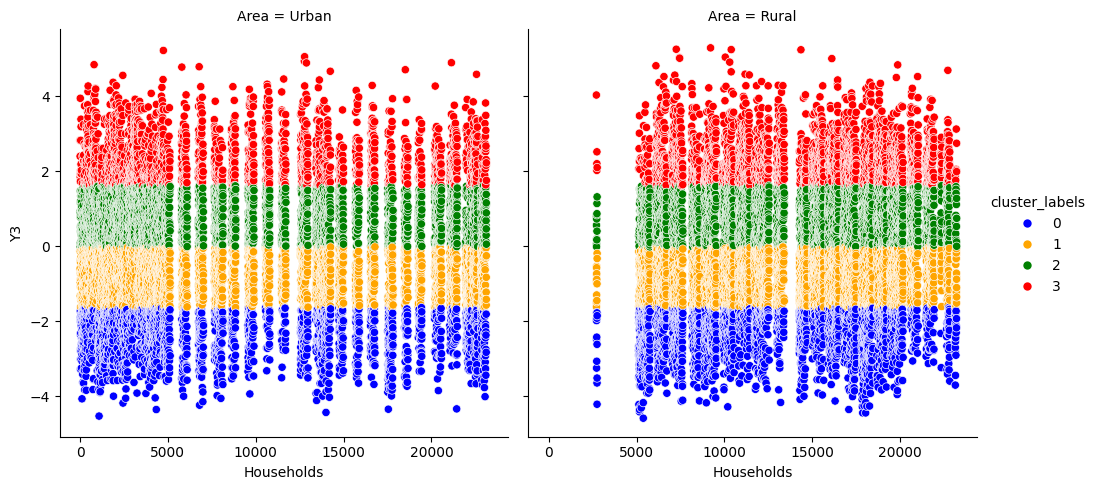

In [27]:
cluster_analysis(X_transformed=X_transformed, comp=comp, n_selected_clusters=n_selected_clusters,
                 adjusted_class_labels={1: 0, 2: 1, 0: 2})

#### Y4

For n_clusters = 2 The average silhouette_score is : 0.5600158213630356
For n_clusters = 3 The average silhouette_score is : 0.538599666185326
For n_clusters = 4 The average silhouette_score is : 0.5236536195597888
For n_clusters = 5 The average silhouette_score is : 0.5217614953141642
For n_clusters = 6 The average silhouette_score is : 0.5215363760066382
For n_clusters = 7 The average silhouette_score is : 0.5155588604187202
For n_clusters = 8 The average silhouette_score is : 0.5205164486739382
For n_clusters = 9 The average silhouette_score is : 0.5192237013934992
For n_clusters = 10 The average silhouette_score is : 0.5201488536764447



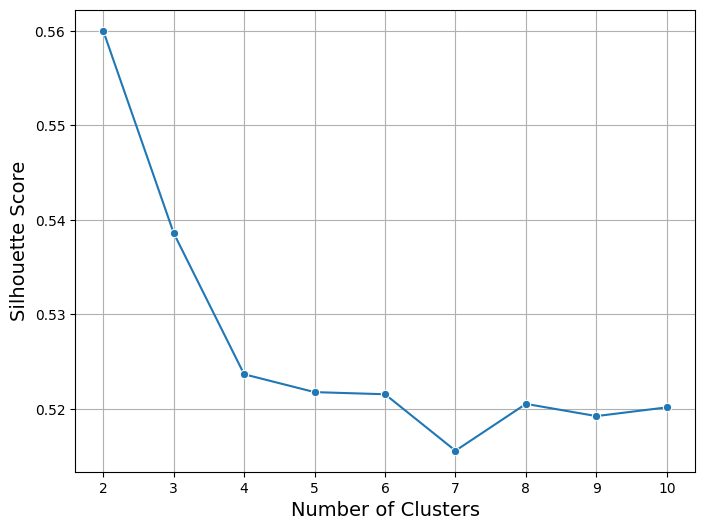

In [28]:
comp = 4
search_no_clusters(X_transformed=X_transformed, comp=comp)

In [29]:
n_selected_clusters = 4
print(f'Selected Number of Clusters: {n_selected_clusters}')

Selected Number of Clusters: 4


KMeans(n_clusters=4, random_state=10)

Households   Area        Y4  cluster_labels
0           0  Urban  0.061106               2
1           1  Urban  1.469831               2
2           2  Urban  0.931022               2
3           3  Urban  0.667056               2
4           4  Urban  1.468522               2

<Figure size 1000x600 with 0 Axes>

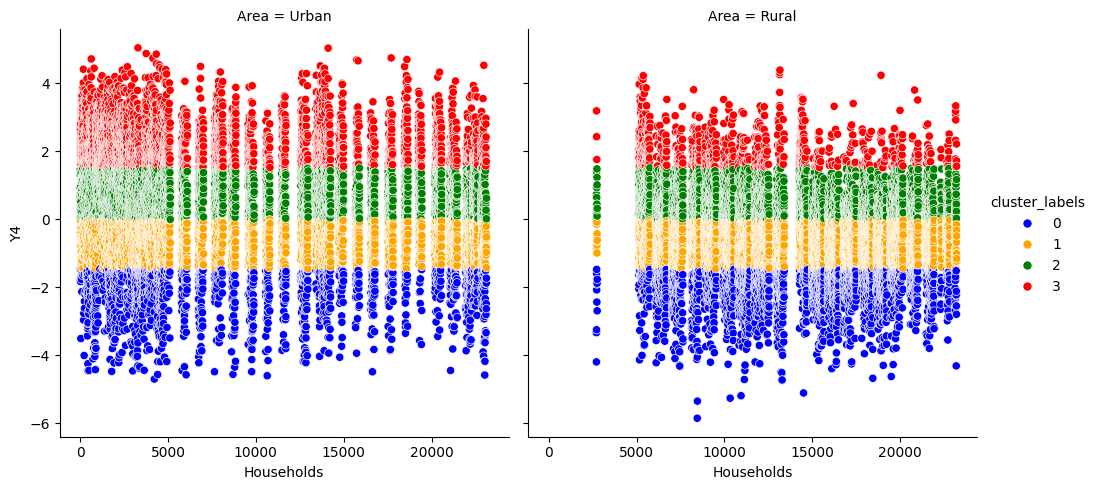

In [30]:
cluster_analysis(X_transformed=X_transformed, comp=comp, n_selected_clusters=n_selected_clusters,
                 adjusted_class_labels={1: 0, 3: 1, 0: 2, 2:3})

#### Y5

For n_clusters = 2 The average silhouette_score is : 0.5619502658293631
For n_clusters = 3 The average silhouette_score is : 0.537970731882247
For n_clusters = 4 The average silhouette_score is : 0.5257834358477674
For n_clusters = 5 The average silhouette_score is : 0.522554846691746
For n_clusters = 6 The average silhouette_score is : 0.5199487013098013
For n_clusters = 7 The average silhouette_score is : 0.5173463297441266
For n_clusters = 8 The average silhouette_score is : 0.5185010553847849
For n_clusters = 9 The average silhouette_score is : 0.5159003863297383
For n_clusters = 10 The average silhouette_score is : 0.5175149944499438



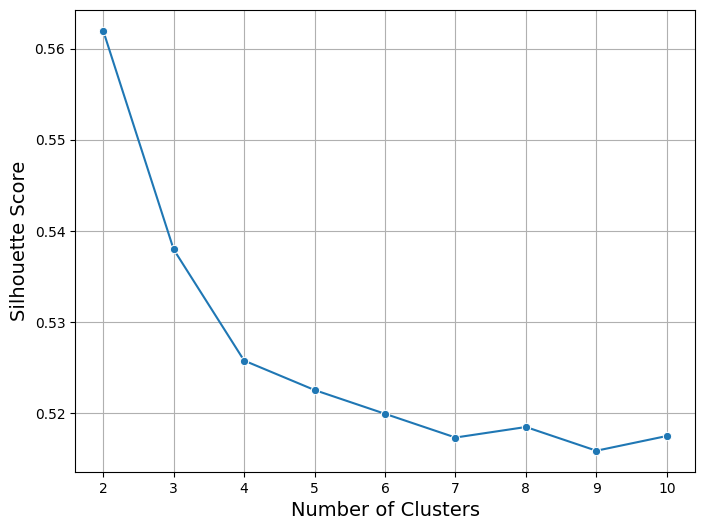

In [31]:
comp = 5
search_no_clusters(X_transformed=X_transformed, comp=comp)

In [32]:
n_selected_clusters = 4
print(f'Selected Number of Clusters: {n_selected_clusters}')

Selected Number of Clusters: 4


KMeans(n_clusters=4, random_state=10)

Households   Area        Y5  cluster_labels
0           0  Urban  0.572977               2
1           1  Urban -1.834589               0
2           2  Urban  1.608855               3
3           3  Urban -0.623779               1
4           4  Urban  0.392625               2

<Figure size 1000x600 with 0 Axes>

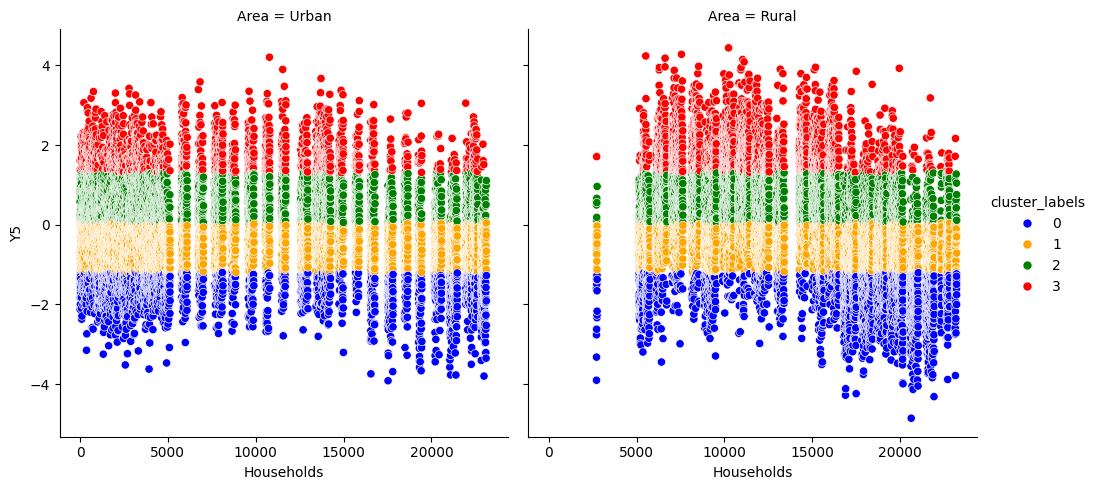

In [33]:
cluster_analysis(X_transformed=X_transformed, comp=comp, n_selected_clusters=n_selected_clusters,
                 adjusted_class_labels={2: 0, 0: 1, 3: 2, 1:3})

# END